This notebook replicates figures from Gao et al., 2018.

In [2]:
import datajoint as dj
from pipeline import ephys, behavior, subject, acquisition
import numpy as np
import matplotlib.pyplot as plt
from pipeline import get_spk_counts, get_trials, get_spk_times, get_psth
import scipy.signal as signal
import scipy.stats as ss
import datetime
import numpy.random as random

## Figure 2c

In [38]:
def compute_mean_and_sem(fr):
    mean_fr = np.average(fr, axis=0)
    sem_fr = np.divide(np.std(fr, axis=0), np.sqrt(np.shape(fr)[0]))
    return mean_fr, sem_fr

In [39]:
# restrict to photo activation sessions
sessions = acquisition.Session & (behavior.TrialSetType & 'trial_set_type = "photo activation"')

# restrict to pyramidal cells, no light trials, only hit trials, trial number > 15
valid_psth = (ephys.AlignedPsth & sessions & 
           (ephys.UnitSpikeTimes & 'unit_cell_type = "pyramidal"') &
           'photo_stim_id = "0"' & 
           'trial_condition = "Hit"' &
           'l_trial_number > 15' &
           'r_trial_number > 15').proj(selectivity = 'sample_selectivity + delay_selectivity + response_selectivity')

# restrict to selective units
fr_diff, bins = (ephys.AlignedPsth & (valid_psth & 'selectivity > 0')).fetch(
    'psth_diff', 'bins')
fr_diff = np.array(fr_diff.tolist())


In [40]:
mean_fr, sem_fr = compute_mean_and_sem(fr_diff)

Text(0, 0.5, 'Selectivity (spks/s)')

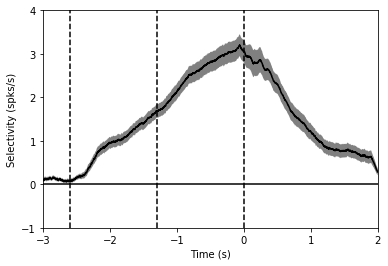

In [41]:
xlim = [-3, 2]
ylim = [-1, 4]
time_points = [-2.6, -1.3, 0]
fig, ax = plt.subplots(1, 1, sharex=True)
for time_point in time_points:
    ax.axvline(x=time_point, color='black', linestyle='dashed')
ax.axhline(y=0, color='black')
ax.fill_between(bins[0], mean_fr+sem_fr, mean_fr-sem_fr, facecolor="gray")
ax.plot(bins[0], mean_fr, color="black")
ax.set_xlim(xlim[0], xlim[1])
ax.set_ylim(ylim[0], ylim[1])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Selectivity (spks/s)')